import libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import plotly.io as pio
import plotly.express as px
from sklearn.preprocessing import LabelEncoder

Read the Dataset

In [ ]:
# fetching dataset-1
df1 = pd.read_csv(r"C:/Users/Bhavani Lalithasri/Downloads/ev_vehicle_dataset.csv")
df1.head(5)

In [12]:
print('DF1 Shape:', df1.shape)

DF1 Shape: (10000, 20)


In [14]:
print('<<< DataSet1-------------------------------')
print(df1.info())

# Statistical summary of the dataset
print('<<<DataSet1-------------')
display(df1.describe())

<<< DataSet1-------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   ID                                  10000 non-null  int64  
 1   Vehicle Type                        10000 non-null  object 
 2   Market Share (%)                    10000 non-null  float64
 3   Annual Sales                        10000 non-null  int64  
 4   Revenue (INR)                       10000 non-null  int64  
 5   Battery Range (Km)                  10000 non-null  int64  
 6   Charging Time (Hours)               10000 non-null  float64
 7   Charging Infrastructure (Stations)  10000 non-null  int64  
 8   Government Incentives (INR)         10000 non-null  int64  
 9   Consumer Adoption Rate (%)          10000 non-null  float64
 10  Fuel Efficiency (Km/L)              10000 non-null  float64
 11

,ID,Market Share (%),Annual Sales,Revenue (INR),Battery Range (Km),Charging Time (Hours),Charging Infrastructure (Stations),Government Incentives (INR),Consumer Adoption Rate (%),Fuel Efficiency (Km/L),Cost per Kilometer (INR),Annual Fuel Consumption (Liters),Fuel Price Trends (INR/Liter),Economic Indicators,Manufacturing Costs (INR)
count,10000.00000,10000.000000,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,1.000000e+04
mean,5000.50000,17.504445,271317.03520,2.551472e+09,274.481200,6.514404,25.026800,254208.429100,30.087170,35.051613,5.454248,1250.60840,95.039359,3.978639,5.980061e+06
std,2886.89568,7.199599,129559.75635,1.436919e+09,129.896034,3.169420,14.119732,141739.373877,11.463890,14.525732,2.600141,430.20149,8.675727,1.730012,2.288489e+06
min,1.00000,5.001321,50132.00000,5.002380e+07,50.000000,1.000093,1.000000,5125.000000,10.005200,10.009015,1.000264,500.00000,80.000826,1.000341,2.000548e+06
25%,2500.75000,11.304797,158876.25000,1.300840e+09,161.000000,3.785223,13.000000,133970.500000,20.136267,22.349453,3.177234,886.00000,87.510403,2.495592,4.022352e+06
50%,5000.50000,17.487787,269536.50000,2.555734e+09,274.000000,6.553430,25.000000,254499.000000,30.188722,35.233465,5.453315,1249.00000,95.008108,3.964209,5.958455e+06
75%,7500.25000,23.790884,382997.75000,3.822231e+09,388.000000,9.250073,37.000000,375172.250000,40.009068,47.889201,7.679584,1623.00000,102.622399,5.466102,7.951273e+06
max,10000.00000,29.998121,499966.00000,4.999788e+09,499.000000,11.999526,49.000000,499994.000000,49.995004,59.992923,9.999928,1999.00000,109.991934,6.999528,9.999916e+06


In [22]:

# Set the renderer to 'browser' or any other that suits your environment
pio.renderers.default = 'browser'

# Now you can display the plot
fig = px.bar(df1, x='Vehicle Type', y='Battery Range (Km)', color='Vehicle Type', title='Battery Range of Vehicles by Type', labels={'x':'Vehicle Type', 'y':'Battery Range (Km)'})
pio.show(fig)
pio.renderers.default = 'notebook'



Text(0.5, 1.0, 'Revenue Comparison')

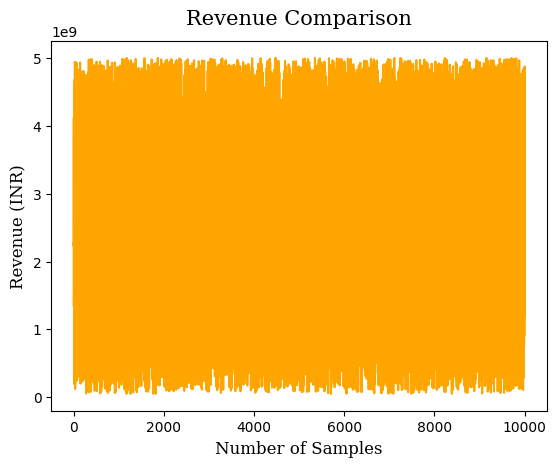

In [23]:
plt.plot(df1['Revenue (INR)'], color='orange')
plt.xlabel('Number of Samples', family='serif', size=12)
plt.ylabel('Revenue (INR)', family='serif', size=12)
plt.title('Revenue Comparison', family='serif', size=15, pad=12)


Text(0.5, 1.0, 'Count of Different Vehicle Types')

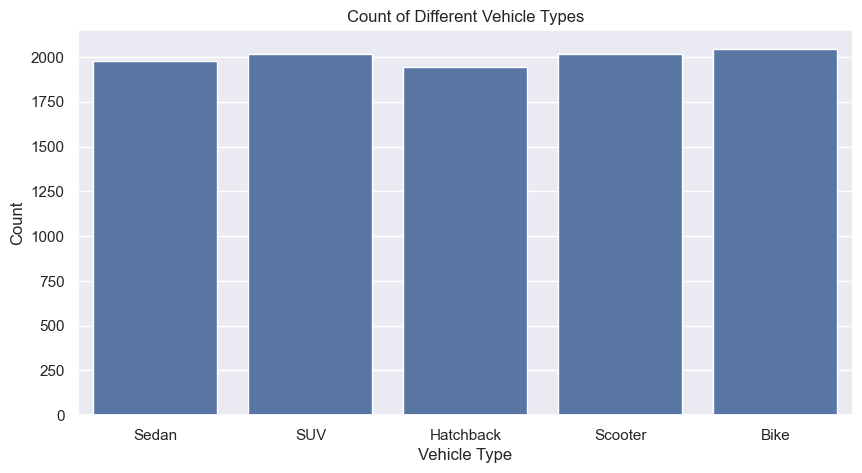

In [24]:
# Count of Vehicle Types
sns.set(rc={'figure.figsize':(10,5)})
ax = sns.countplot(data=df1, x='Vehicle Type')
plt.xlabel('Vehicle Type')
plt.ylabel('Count')
plt.title('Count of Different Vehicle Types')

C:\Users\Bhavani Lalithasri\AppData\Local\Temp\ipykernel_16184\3795929301.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




Text(0.5, 1.0, 'Fuel Efficiency by Vehicle Type')

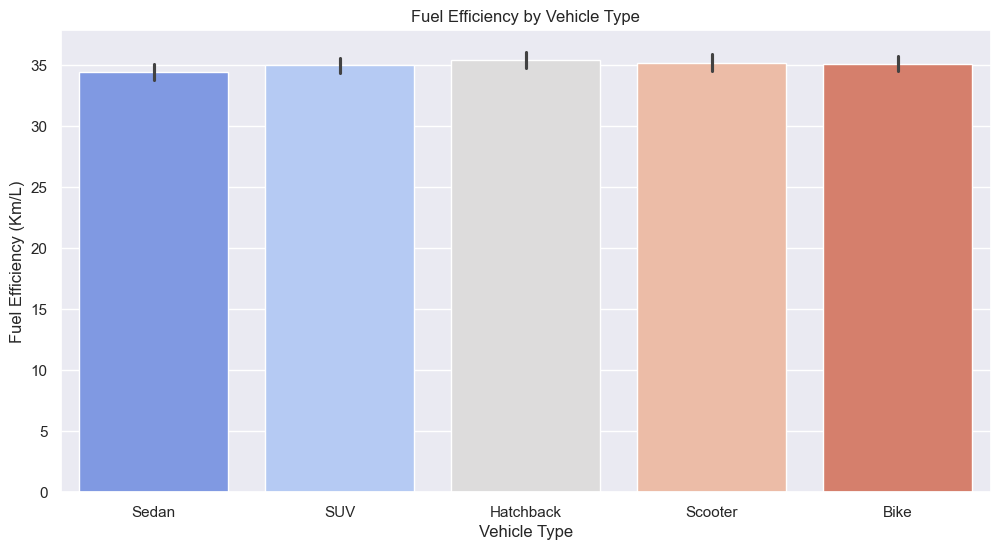

In [25]:
plt.figure(figsize=(12, 6))
sns.barplot(data=df1, x='Vehicle Type', y='Fuel Efficiency (Km/L)', palette='coolwarm')
plt.xlabel('Vehicle Type')
plt.ylabel('Fuel Efficiency (Km/L)')
plt.title('Fuel Efficiency by Vehicle Type')


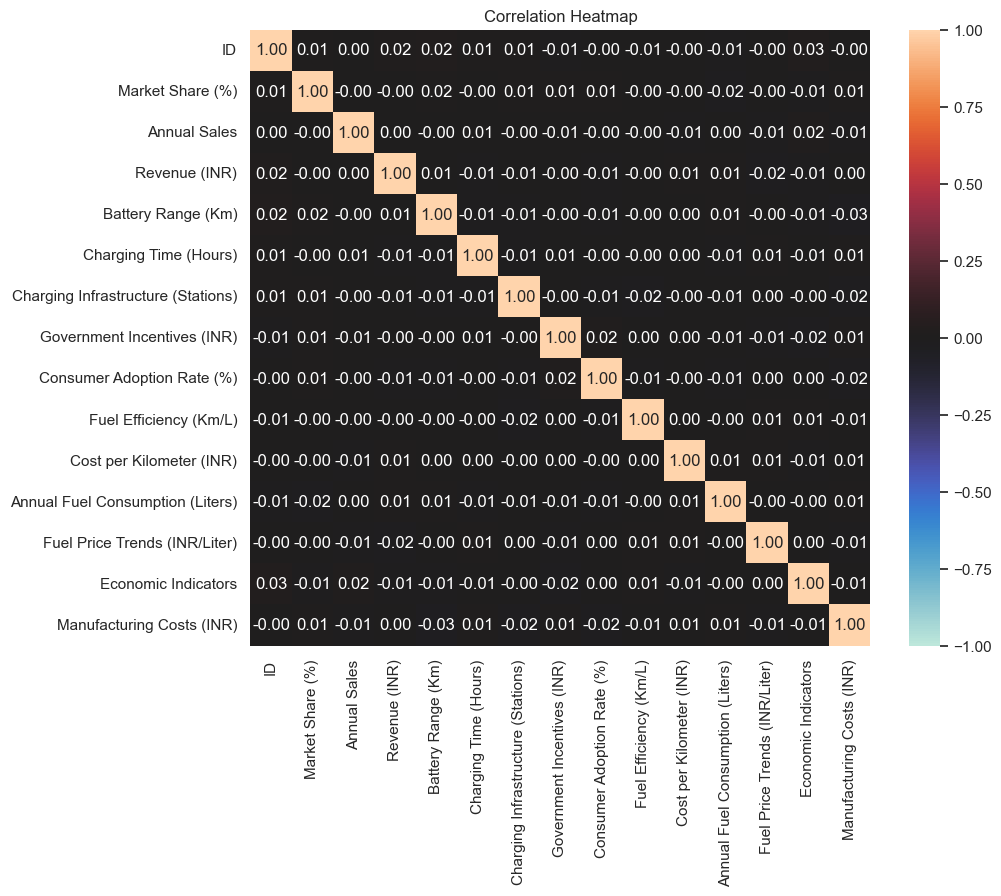

In [27]:
# Filter only numerical columns for correlation
numerical_columns = df1.select_dtypes(include=[np.number])

# Correlation Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(numerical_columns.corr(), annot=True, vmin=-1, vmax=1, center=0, fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()


In [28]:
# Label Encoding for categorical features
le = LabelEncoder()
columns_to_encode = ['Vehicle Type', 'Competitor Analysis', 'Environmental Impact', 'Battery Technology', 'Innovation Potential']
for column in columns_to_encode:
    df1[column] = le.fit_transform(df1[column])


In [29]:
# Feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df1)


In [30]:
# Principal Component Analysis (PCA)
features = ['Market Share (%)', 'Battery Range (Km)', 'Charging Time (Hours)', 'Fuel Efficiency (Km/L)', 'Cost per Kilometer (INR)', 'Annual Fuel Consumption (Liters)', 'Fuel Price Trends (INR/Liter)']
x = df1[features].values
x = StandardScaler().fit_transform(x)
pca = PCA(n_components=7)
X_pca = pca.fit_transform(x)

In [31]:
# PCA Results
df_pca = pd.DataFrame(X_pca, columns=[f'PC{i}' for i in range(1, 8)])
df_pca.head()


,PC1,PC2,PC3,PC4,PC5,PC6,PC7
0,-1.169423,0.426945,-2.246062,0.481421,-0.435866,1.378035,0.407663
1,0.755511,-0.223011,-0.278373,0.505420,-0.232925,-1.046707,1.832329
2,-0.299090,-0.187207,-1.031917,0.627051,0.565656,1.920471,0.541198
3,1.548797,1.297732,-0.795005,1.228310,1.157496,0.107141,-0.349486
4,-1.283906,0.111381,-0.274809,-0.316687,-1.222304,-0.417589,0.205854


In [32]:
# K-Means Clustering
wcss = []
for i in range(1, 11):
    kmean = KMeans(n_clusters=i, init='k-means++', random_state=90)
    kmean.fit(X_pca)
    wcss.append(kmean.inertia_)

Text(0, 0.5, 'WCSS')

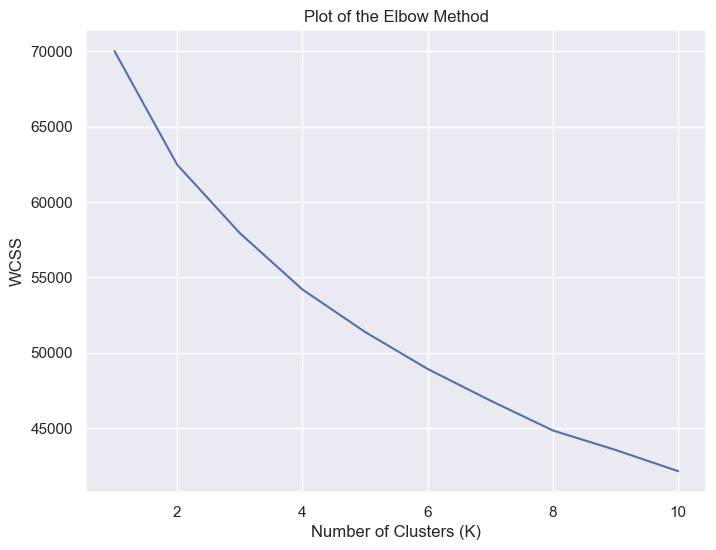

In [33]:
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), wcss)
plt.title('Plot of the Elbow Method')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('WCSS')


In [34]:
kmean = KMeans(n_clusters=4, init='k-means++', random_state=90)
kmean.fit(X_pca)

KMeans(n_clusters=4, random_state=90)

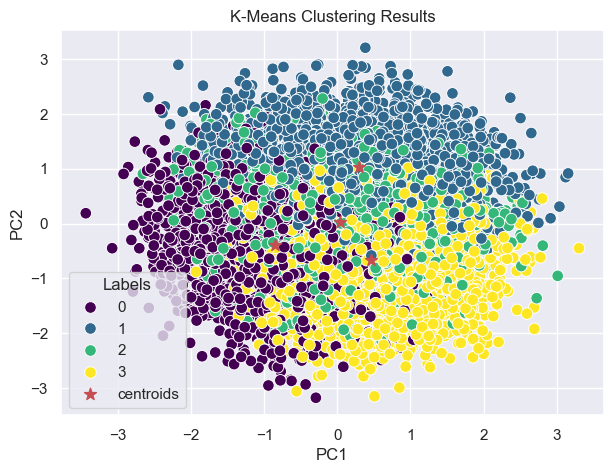

In [35]:
plt.figure(figsize=(7, 5))
sns.scatterplot(data=df_pca, x='PC1', y='PC2', s=70, hue=kmean.labels_, palette='viridis')
plt.scatter(x=kmean.cluster_centers_[:, 0], y=kmean.cluster_centers_[:, 1], marker="*", c="r", s=80, label="centroids")
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('K-Means Clustering Results')
plt.legend(title='Labels')
plt.show()